In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

from scipy import signal



In [2]:
start_time = time.perf_counter()

fp = '2025_day4_input.txt'

with open(fp, 'r') as file:
    input = file.readlines()

rows_count = 0
rows = []

for line in input:
    rows_count += 1
    row = line.strip('\n')
    rows.append(row)

cols_count = len(rows[0])

rolls = np.zeros((rows_count, cols_count), dtype=int)

kern = np.ones((3, 3), dtype=int)

for i, row in enumerate(rows):
    for j, val in enumerate(row):
        if val == '@':
            rolls[i, j] = 1

In [3]:
print(rolls.shape)

(136, 136)


In [4]:
result = signal.convolve2d(rolls, kern, mode='same')

movable_rolls = 0

for idx, val in np.ndenumerate(result):
    if val <= 4 and rolls[idx] == 1:
        movable_rolls += 1

time1 = time.perf_counter()

print(f'Part 1: {movable_rolls} \t Time = {time1 - start_time:.4f}s')


Part 1: 1397 	 Time = 0.0655s


Part 2: 0 	 iterations: 1 	 Time = 16.6673s


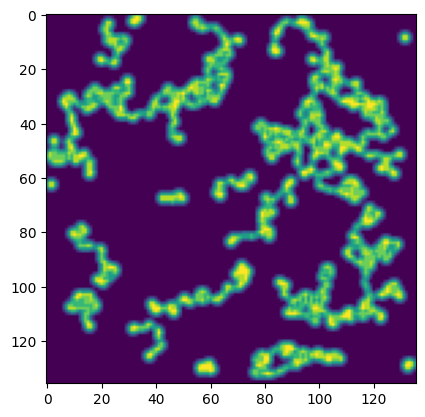

In [6]:
rolls_remaining = rolls

moved_rolls_total = 0
moved_rolls_this_iter = 1
iterations = 0

while moved_rolls_this_iter > 0:
    iterations += 1
    moved_rolls_this_iter = 0

    result = signal.convolve2d(rolls_remaining, kern, mode='same')
    
    for idx, val in np.ndenumerate(result):
        if val <= 4 and rolls[idx] == 1:
            moved_rolls_this_iter += 1
            moved_rolls_total += 1
            rolls_remaining[idx] = 0
    
    # print(f'iter: {iterations} \t moved: {moved_rolls_this_iter}\t total moved: {moved_rolls_total}')


time2 = time.perf_counter()
plt.imshow(result)

print(f'Part 2: {moved_rolls_total} \t iterations: {iterations} \t Time = {time2 - time1:.4f}s')
    